In [1]:
import torch
import sys
# add parent directory to the front of sys.path
sys.path.insert(0, '..')
import final_model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = final_model.Net().to(device)
model.load_state_dict(torch.load("../working_model.pth", weights_only=True, map_location=torch.device('cpu')))
model.eval()

Net(
  (sa1_module): SAModule(
    (conv): PointNetConv(local_nn=MLP(4, 64, 64, 128), global_nn=None)
  )
  (sa2_module): SAModule(
    (conv): PointNetConv(local_nn=MLP(131, 128, 128, 256), global_nn=None)
  )
  (sa3_module): GlobalSAModule(
    (nn): MLP(259, 256, 512, 1024)
  )
  (encode): MLP(1024, 512)
  (mlp_mu): MLP(512, 512)
  (mlp_logvar): MLP(512, 512)
  (sdf1): MLP(515, 256, 128)
  (sdf2): MLP(131, 64, 1)
)

In [2]:
import torch

# for reproducibility (optional)
# torch.manual_seed(42)

# sample uniformly in [-0.6, 0.6] to be query points
queries = [torch.empty(15000, 3).uniform_(-0.6, 0.6).to(device) for i in range(10)] # 5000, 3]

# Sample from N(0,1)
latent_code = [torch.randn(1, 512).to(device) for i in range(10)]

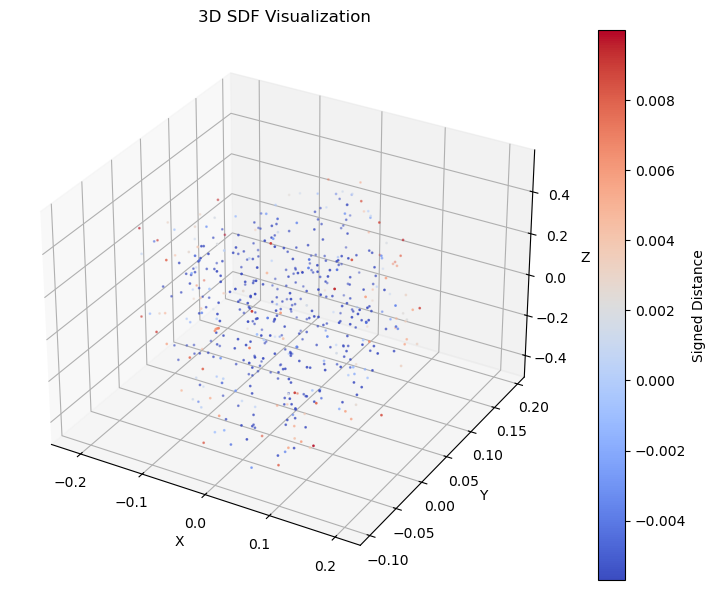

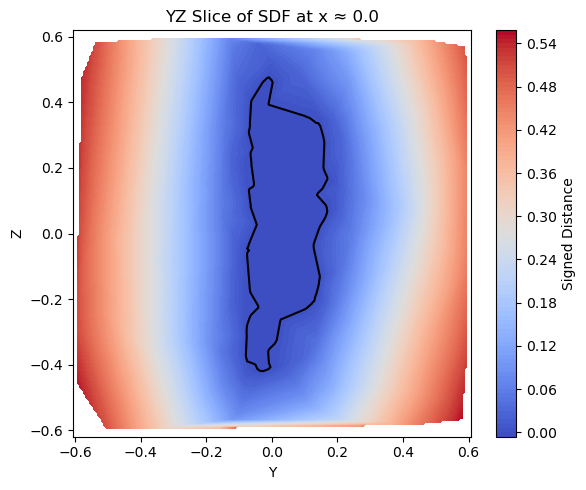

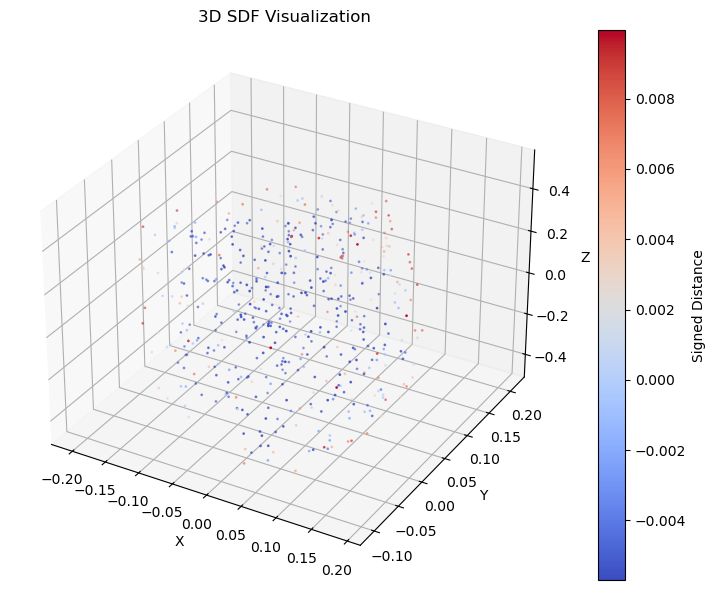

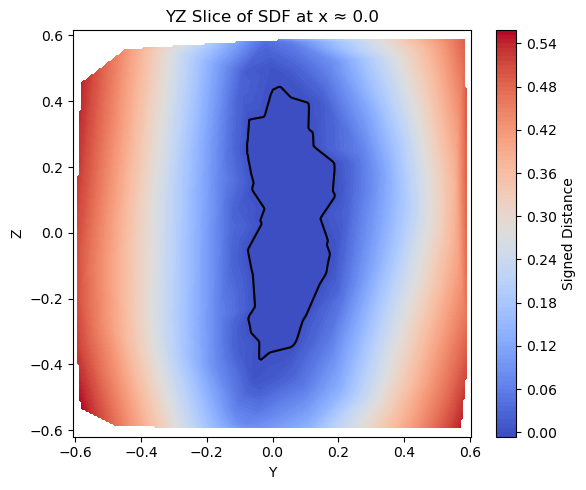

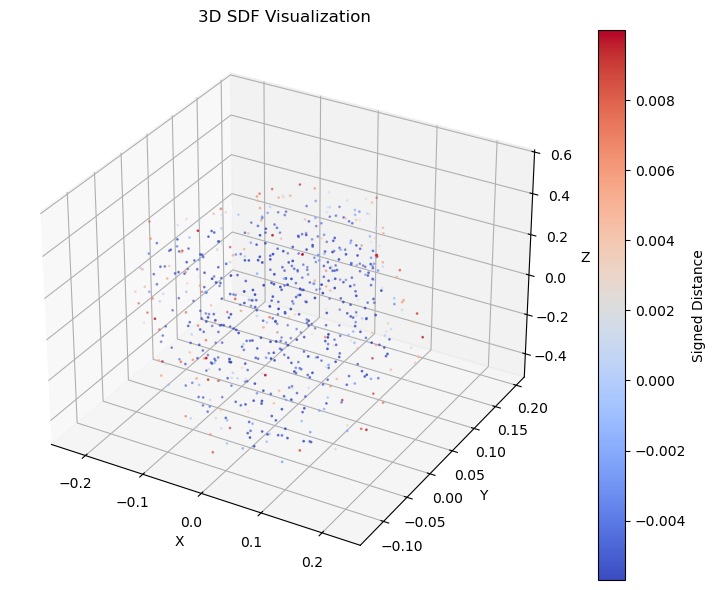

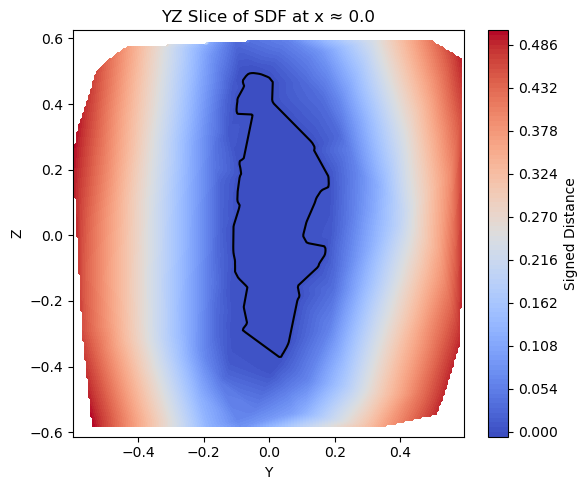

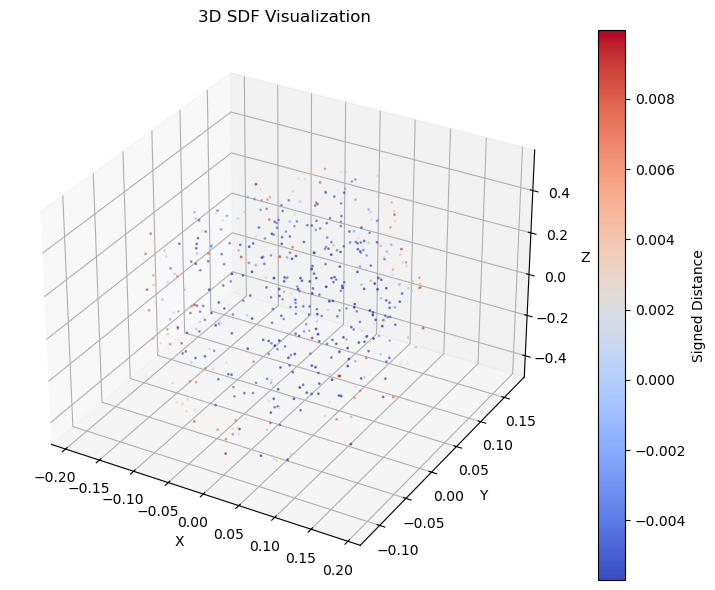

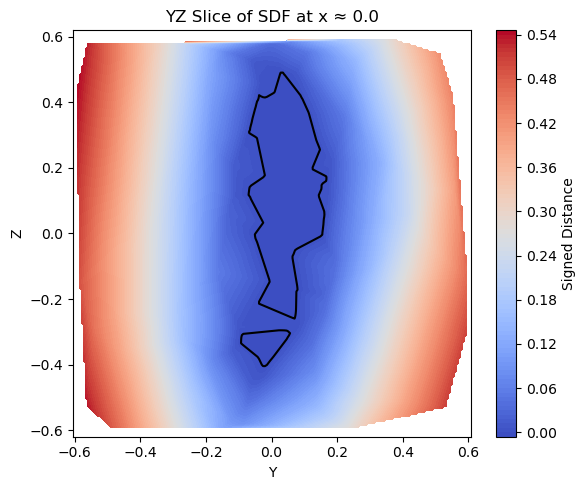

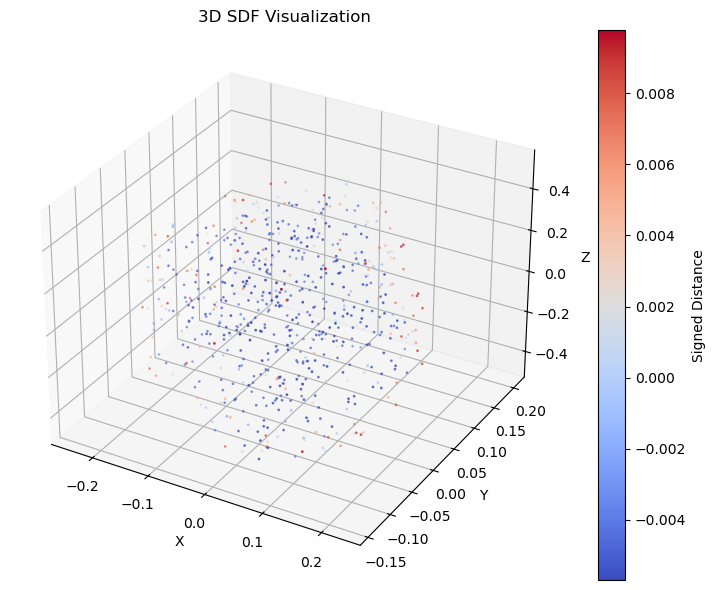

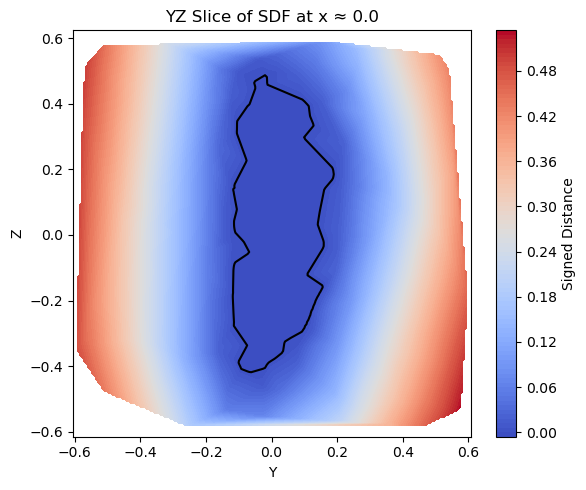

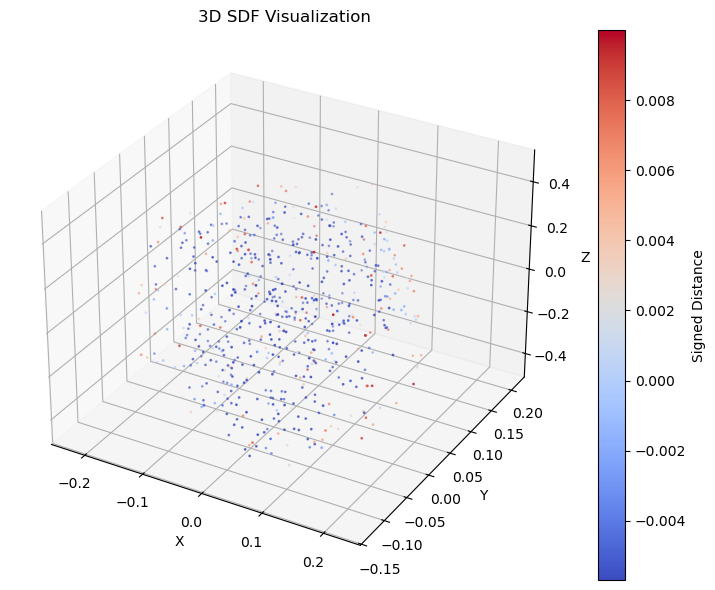

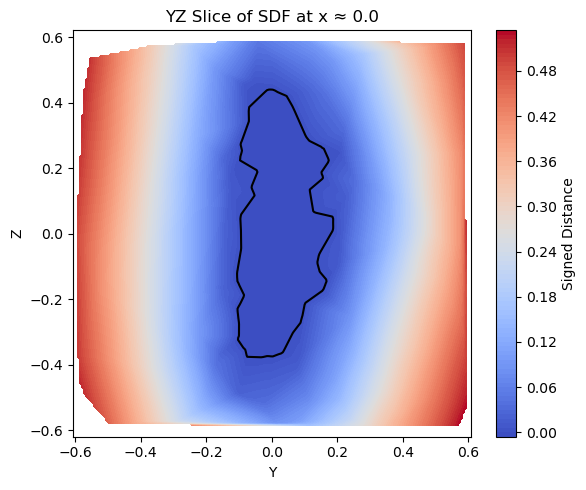

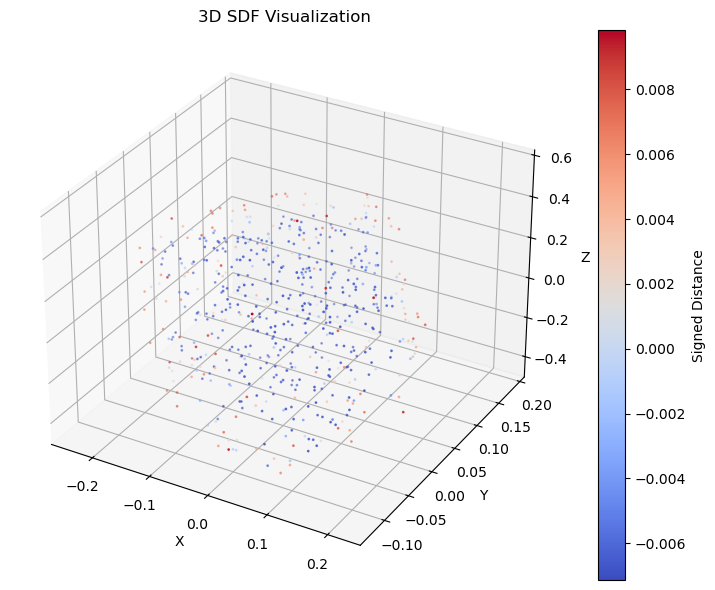

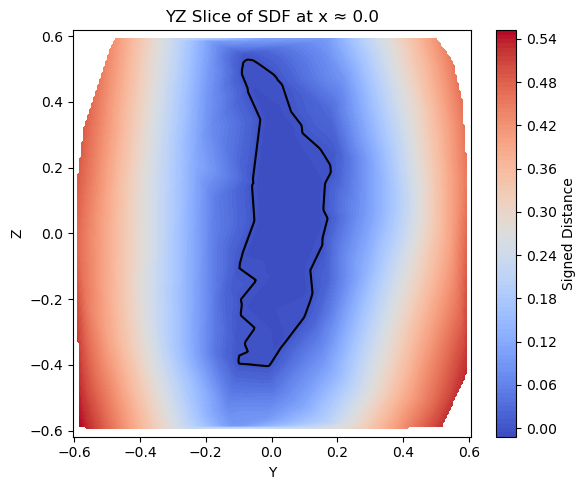

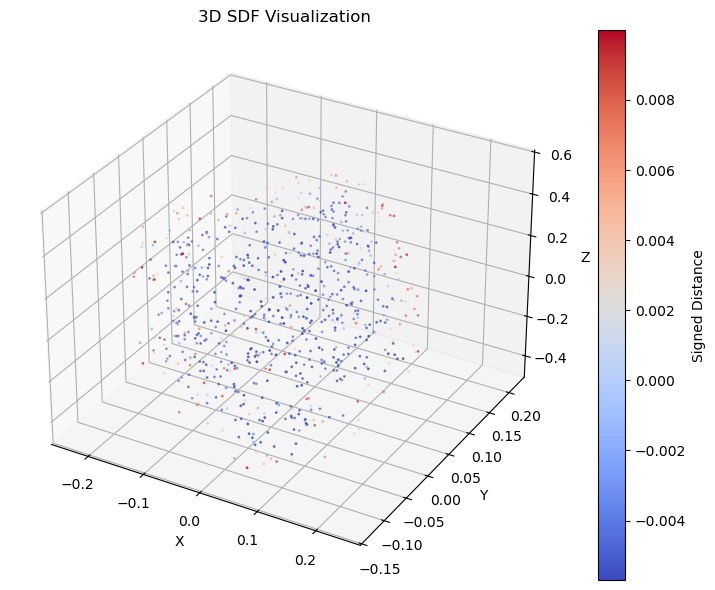

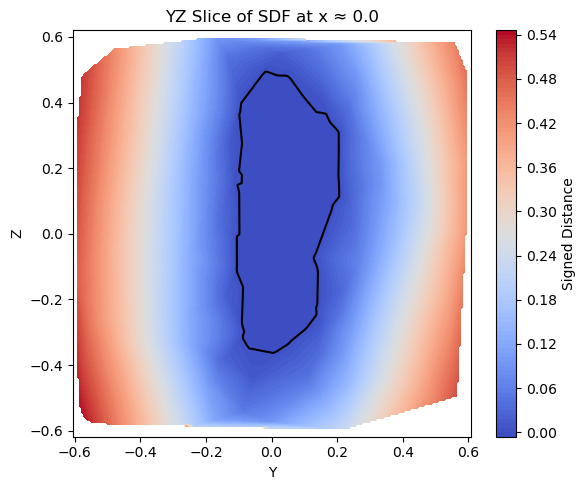

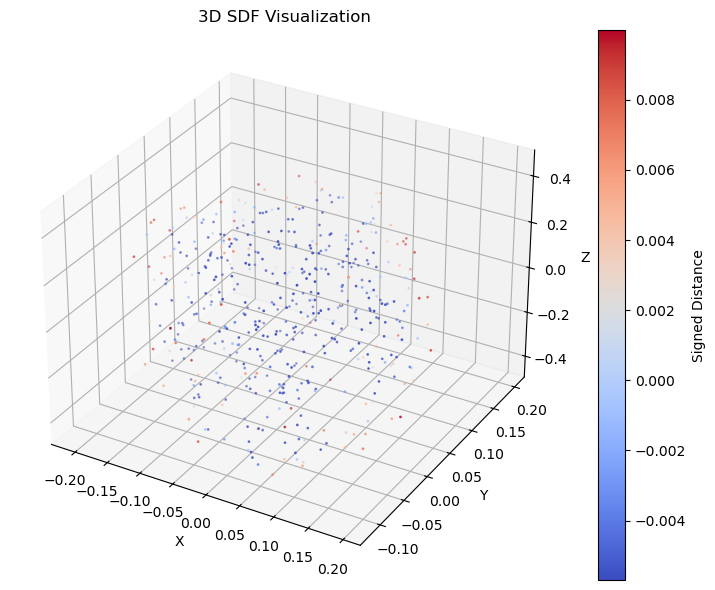

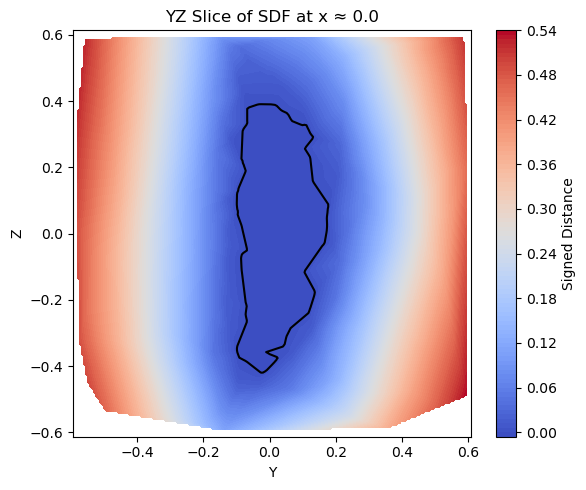

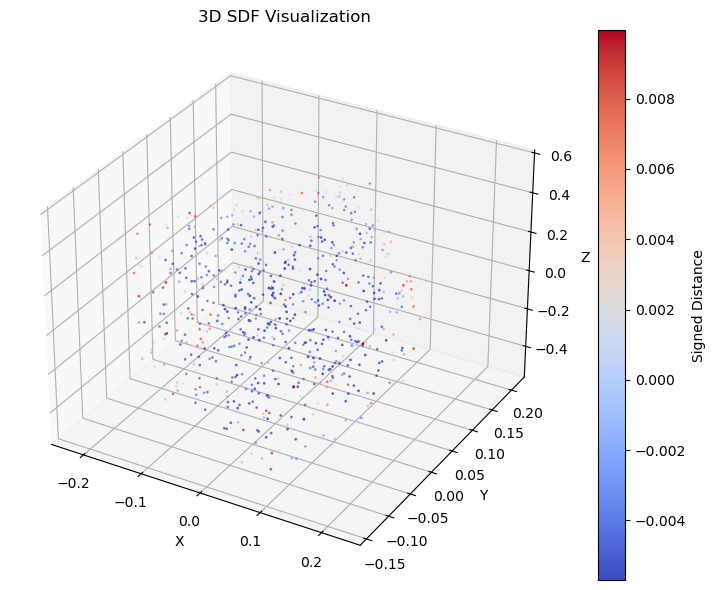

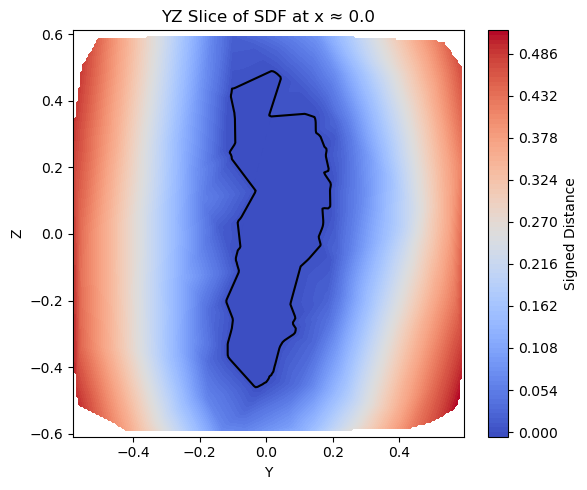

In [6]:
for i in range(10):
    out = model.decoder(latent_code[i], queries[i])

    prediction = torch.cat((queries[i], out), dim=-1).detach().cpu()

    import dataset_utils as du
    # du.visualize_sdf_3d(prediction.squeeze(0))

    du.visualize_sdf_surface_3d(prediction.squeeze(0), tolerance=0.01)
    du.visualize_sdf_2d(prediction.squeeze(0))